In [80]:
import pandas as pd
import numpy as np
from glob import glob
import re
import matplotlib.pyplot as plt

# PART 1 DATA CLEANSING

In [81]:
# STEP 1 CREATING LIST OF DATA FRAMES BY IMPORTING MULTIPLE FILES USING loop & glob
frames = [pd.read_csv(csv)
         for csv in sorted(glob('states[0-9].csv'))]

In [82]:
# STEP 2 COMBING ALL DATA FILES INTO SINGLE DATA FRAME.
us_census= pd.concat(frames)

In [83]:
us_census.drop('Unnamed: 0', axis = 1, inplace= True)
us_census.reset_index(drop = True,inplace=True)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


In [84]:
# STEP 3 TO LOOK AT COLUMN NAMES AND THEIR TYPES
us_census.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')

In [85]:
us_census.dtypes

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object

In [86]:
us_census.Income = us_census.Income.str.replace('$','').astype(float)
# STEP 3 Above line of code will omit $ sign and convert object data type to float (numeric) value.

In [87]:
us_census.dtypes

State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income       float64
GenderPop     object
dtype: object

In [88]:
# STEP 4 LOADING FIRST FIVE ROWS OF DATA
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F


In [89]:
# STEP 5&6 USING THE REGEX & SPLITTING OF MALE & FEMALE DATA FROM GENDER COLUMN.
gp = us_census.GenderPop.replace(['M','F'], '',regex=True).str.split('_')
m , f = gp.apply(lambda x: x[0]), gp.apply(lambda x: x[1])
us_census['Male'], us_census['Female'] = [m, f]

In [90]:
# STEP 7 CONVERSION OF DATA INTO NUMERIC FORM. 
us_census.Male, us_census.Female = pd.to_numeric(us_census.Male), pd.to_numeric(us_census.Female)
us_census[['Male', 'Female']].head()

,Male,Female
0,2341093,2489527.0
1,384160,349215.0
2,3299088,3342840.0
3,1451913,1506295.0
4,19087135,19334329.0


In [91]:
# STEP 8 HANDLING NAN VALUES IN THE DATA OF FEMALE COLUMN.
us_census.Female.fillna(us_census.TotalPop - us_census.Male, inplace=True)
us_census[['Male', 'Female']].head()

,Male,Female
0,2341093,2489527.0
1,384160,349215.0
2,3299088,3342840.0
3,1451913,1506295.0
4,19087135,19334329.0


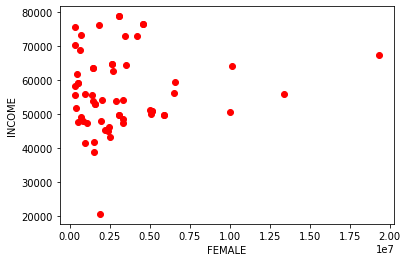

In [92]:
# STEP 9 PLOTTING A SCATTER GRAPH B/W FEMALE & INCOME
plt.scatter(us_census.Female, us_census.Income, color=['red'])
plt.xlabel('FEMALE')
plt.ylabel('INCOME')
plt.show()

In [93]:
# REMOVING DUPLICATE VALUES
us_census.duplicated().value_counts()

False    51
True      9
dtype: int64

In [94]:
us_census.drop_duplicates(inplace= True)
us_census.reset_index(drop=True, inplace=True)
us_census.duplicated().value_counts()

False    51
dtype: int64

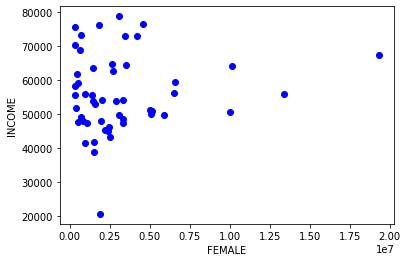

In [95]:
# RE-DRAWING A SCATTER GRAPH AFTER REMOVING DUPLICATE VALUES
plt.scatter(us_census.Female, us_census.Income, color=['blue'])
plt.xlabel('FEMALE')
plt.ylabel('INCOME')
plt.show()

In [96]:
us_census.duplicated().value_counts()

False    51
dtype: int64

In [97]:
# REMOVING % SIGN FROM ALL THE DATA
us_census.iloc[: , 2:8] = us_census.iloc[: , 2:8].replace('%', '', regex= True).astype(float)

In [98]:
# FINDING ALL NAN VALUES IN PACIFIC COLUMN
us_census.Pacific.loc[us_census.Pacific.isnull()==True]

5    NaN
7    NaN
16   NaN
34   NaN
Name: Pacific, dtype: float64

In [99]:
# REPLACING NAN VALUE WITH MEAN VALUE OF PACIFIC COLUMN.
us_census.Pacific.fillna(us_census.Pacific.mean(), inplace=True)

In [100]:
# CONSTRUCTING A FUNCTION TO DRAW HISTOGRAMS
def rhist(r, c):
    plt.hist(us_census[r], ec='red', color=c)
    plt.title(r)
    plt.xlabel("Percentage of Population")
    plt.ylabel('Frequency')
    plt.show()


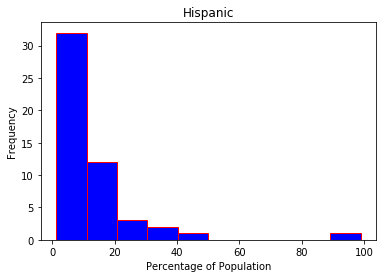

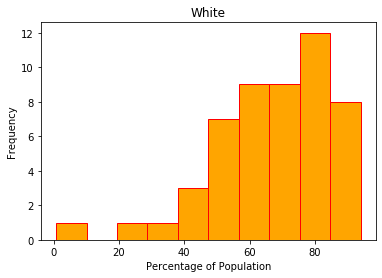

In [101]:
rhist('Hispanic', 'blue')
rhist('White', 'orange')

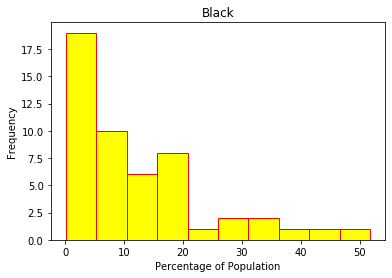

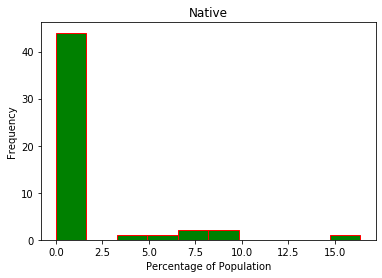

In [102]:
rhist('Black', 'yellow')
rhist('Native', 'green')

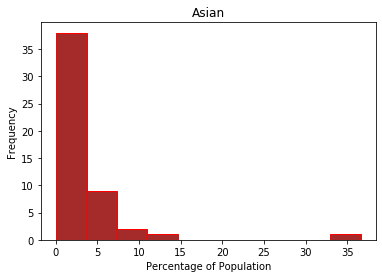

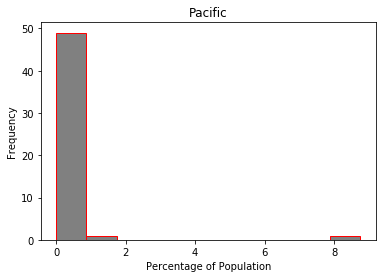

In [103]:
rhist('Asian', 'brown')
rhist('Pacific', 'grey')

# PART 2

In [104]:
inventory = pd.DataFrame(pd.read_csv('inventory.csv'))

In [105]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [106]:
staten_island = inventory.iloc[:10 , :]

In [107]:
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [108]:
product_request = staten_island.product_description

In [109]:
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [110]:
seed_request = inventory.loc[(inventory['location']== 'Brooklyn')
                             & (inventory['product_type']=='seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [111]:
inventory['in_stock'] = inventory.quantity != 0
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


In [112]:
inventory['total_value'] = inventory['price'] * inventory['quantity']

In [113]:
inventory.head(10)

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [114]:
combine_lambda = lambda row:'{} - {}'.format(row.product_type, row.product_description)
inventory['full_description']= inventory.apply(combine_lambda, axis = 1)
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
